 # Pregunta 1 - Extracción de datos de acciones de Tesla utilizando yfinance
 

In [3]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Pregunta 2 - Extracción de datos de ingresos de Tesla utilizando Webscraping

In [8]:
!pip install lxml

In [9]:
import requests
from bs4 import BeautifulSoup
from io import StringIO
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(url).text

soup = BeautifulSoup(data, "html.parser")

tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(StringIO(str(table)))[0]
        break

tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


# Pregunta 3 - Extracción de datos de acciones de GameStop utilizando yfinance

In [15]:
import yfinance as yf
import pandas as pd

Gamestop = yf.Ticker("GME")

Gamestop_data = Gamestop.history(period="max")

Gamestop_data.reset_index(inplace=True)

Gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Pregunta 4 - Extracción de datos de ingresos de GameStop utilizando Webscraping

In [28]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [29]:
import requests
from bs4 import BeautifulSoup
from io import StringIO
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
GameStop_revenue = None
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        Gamestop_revenue = pd.read_html(StringIO(str(table)))[0]
        break

if GameStop_revenue is not None:
    GameStop_revenue.columns = ["Date", "Revenue"]
    GameStop_revenue["Revenue"] = GameStop_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
    GameStop_revenue.dropna(inplace=True)
    GameStop_revenue = GameStop_revenue[GameStop_revenue["Revenue"] != ""]
    GameStop_revenue.head()
else:
    print("No se encontró la tabla de ingresos de GameStop.")


No se encontró la tabla de ingresos de GameStop.


# Pregunta 5 - Tablero de acciones e ingresos de Tesla

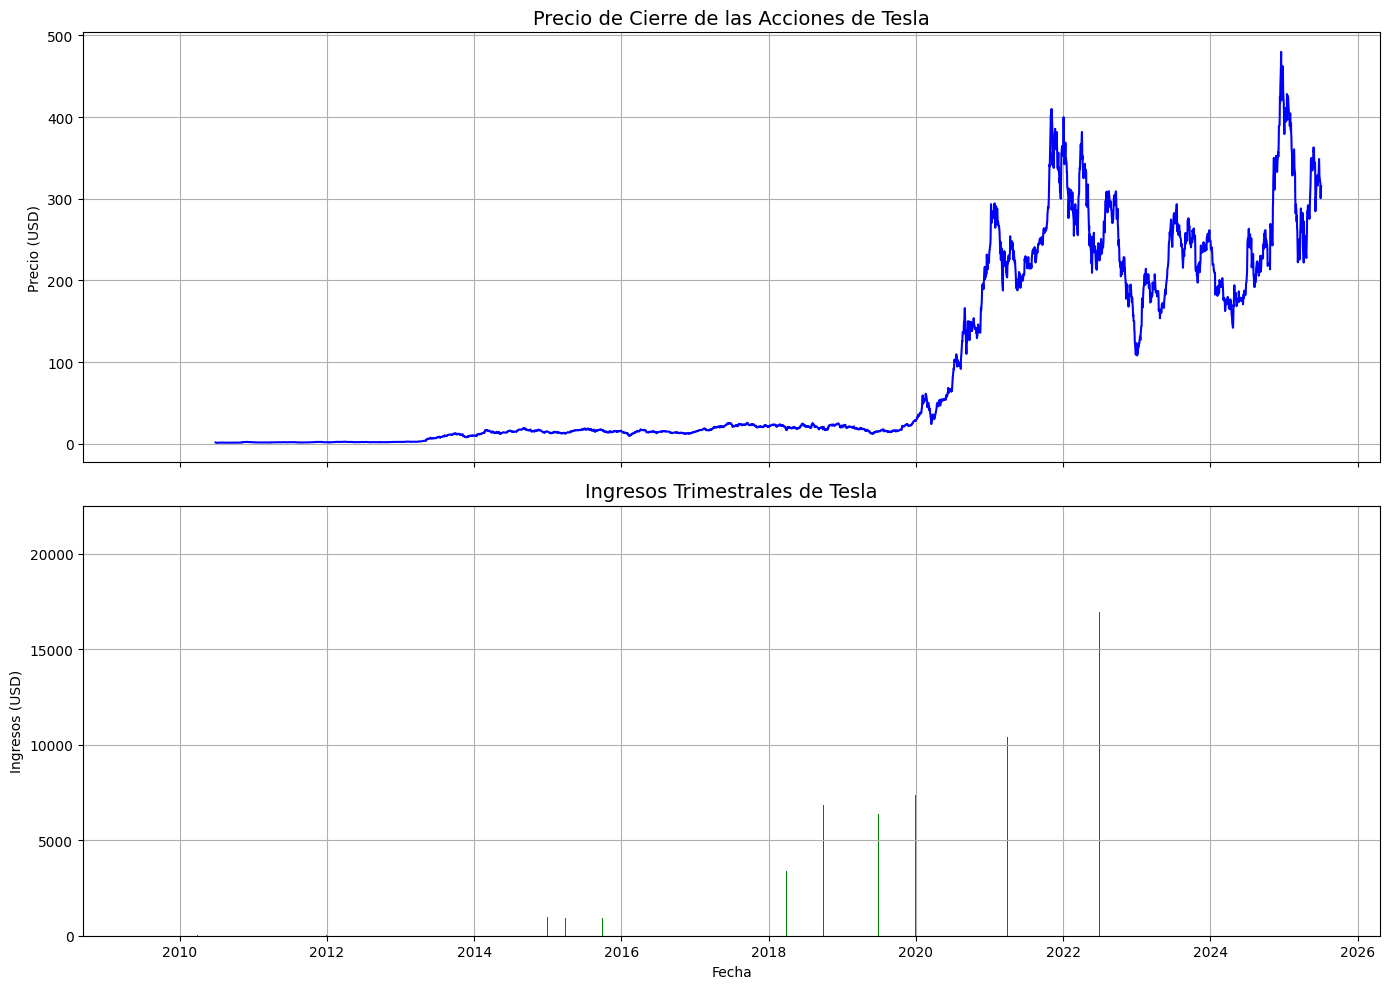

In [20]:
import matplotlib.pyplot as plt

tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax[0].plot(tesla_data['Date'], tesla_data['Close'], color='blue')
ax[0].set_title('Precio de Cierre de las Acciones de Tesla', fontsize=14)
ax[0].set_ylabel('Precio (USD)')
ax[0].grid(True)

ax[1].bar(tesla_revenue['Date'], tesla_revenue['Revenue'].astype(float), color='green')
ax[1].set_title('Ingresos Trimestrales de Tesla', fontsize=14)
ax[1].set_ylabel('Ingresos (USD)')
ax[1].set_xlabel('Fecha')
ax[1].grid(True)

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Pregunta 6 - Cuadro de mando de acciones e ingresos de GameStop


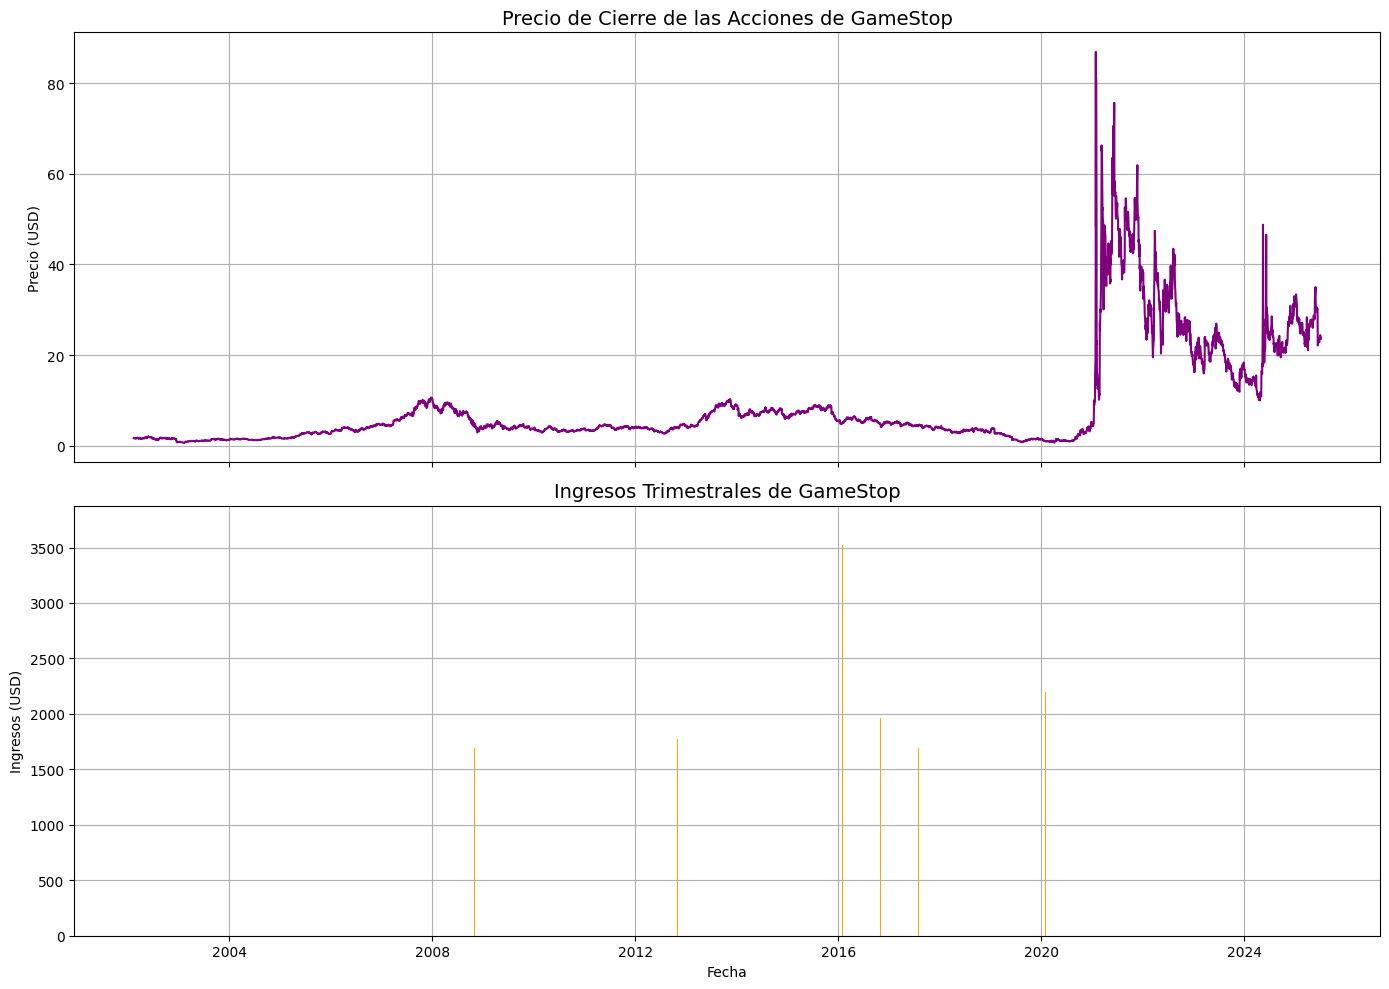

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que los nombres de columnas sean correctos
Gamestop_revenue.columns = ['Date', 'Revenue']

# Convertir columnas a los tipos adecuados
gamestop_data['Date'] = pd.to_datetime(gamestop_data['Date'])
Gamestop_revenue['Date'] = pd.to_datetime(Gamestop_revenue['Date'])
Gamestop_revenue['Revenue'] = Gamestop_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
Gamestop_revenue['Revenue'] = Gamestop_revenue['Revenue'].astype(float)

# Crear los gráficos
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax[0].plot(gamestop_data['Date'], gamestop_data['Close'], color='purple')
ax[0].set_title('Precio de Cierre de las Acciones de GameStop', fontsize=14)
ax[0].set_ylabel('Precio (USD)')
ax[0].grid(True)

ax[1].bar(Gamestop_revenue['Date'], Gamestop_revenue['Revenue'], color='orange')
ax[1].set_title('Ingresos Trimestrales de GameStop', fontsize=14)
ax[1].set_ylabel('Ingresos (USD)')
ax[1].set_xlabel('Fecha')
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Autor:

### Cesar Stick Quintero Klinger
